# **IRIS FLOWER CLASSIFICATION**

**Installing Pandas**

In [1]:
pip install pandas 

Note: you may need to restart the kernel to use updated packages.


**Importing Libraries & Modules**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report



**Importing Dataset**

In [3]:
iris = load_iris()

In [4]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

**Converting it into DataFrame**

In [5]:
iris_df  = pd.DataFrame(data = np.c_[iris.data,iris.target],columns = iris.feature_names+["Species"])
data = iris_df.copy()
data.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
102,7.1,3.0,5.9,2.1,2.0
124,6.7,3.3,5.7,2.1,2.0
94,5.6,2.7,4.2,1.3,1.0
29,4.7,3.2,1.6,0.2,0.0
90,5.5,2.6,4.4,1.2,1.0
63,6.1,2.9,4.7,1.4,1.0
28,5.2,3.4,1.4,0.2,0.0
52,6.9,3.1,4.9,1.5,1.0
92,5.8,2.6,4.0,1.2,1.0
89,5.5,2.5,4.0,1.3,1.0


**Understanding the dataset**

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


**Describing the dataset**

In [19]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [6]:
data["Species"].value_counts()


0.0    50
1.0    50
2.0    50
Name: Species, dtype: int64

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
# 0 = SETOSA, 1 = VERSICOLOR , 2 = "VIRGINICA"

__Splitting Train and Test data__

In [9]:
X = data.drop(["Species"],axis = 1)
y = data["Species"]

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 35)
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

__Prediction__

In [13]:
acc = accuracy_score(y_test,y_pred)*100
c_m = confusion_matrix(y_test,y_pred)
c_r = classification_report(y_test,y_pred)
print("Accuracy :",acc)
print("Confusion matric:",c_m)
print("classification Report :",c_r)

Accuracy : 100.0
Confusion matric: [[11  0  0]
 [ 0 10  0]
 [ 0  0  9]]
classification Report :               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       1.00      1.00      1.00        10
         2.0       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# **PLOTTING**

__COUNTPLOT__

<AxesSubplot:xlabel='Species', ylabel='count'>

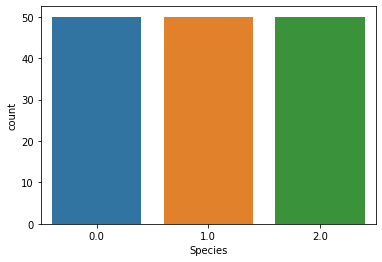

In [14]:
sns.countplot(x = "Species",data = data)

__BOXPLOT__

C:\Users\rithi\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:224: UserWarning: When passing multiple axes, layout keyword is ignored
  warnings.warn(


sepal length (cm)       AxesSubplot(0.125,0.125;0.133621x0.755)
sepal width (cm)     AxesSubplot(0.285345,0.125;0.133621x0.755)
petal length (cm)     AxesSubplot(0.44569,0.125;0.133621x0.755)
petal width (cm)     AxesSubplot(0.606034,0.125;0.133621x0.755)
Species              AxesSubplot(0.766379,0.125;0.133621x0.755)
dtype: object

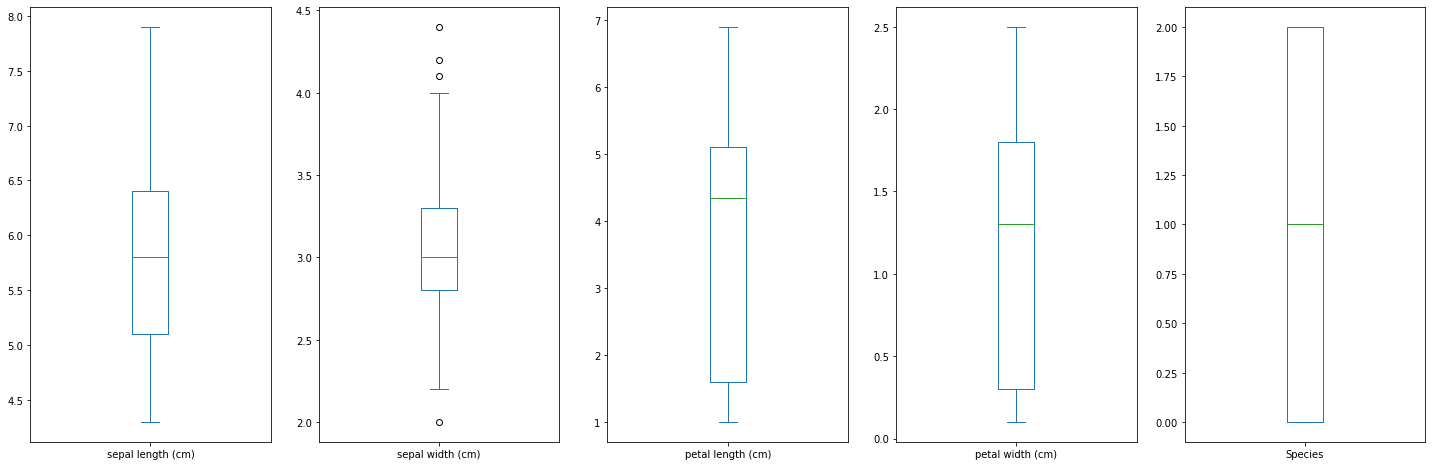

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(25, 8))

data.plot(kind="box", subplots=True, layout=(2, 3), sharex=False, ax=axes)

__HISTOGRAM__

array([[<AxesSubplot:title={'center':'sepal length (cm)'}>,
        <AxesSubplot:title={'center':'sepal width (cm)'}>],
       [<AxesSubplot:title={'center':'petal length (cm)'}>,
        <AxesSubplot:title={'center':'petal width (cm)'}>],
       [<AxesSubplot:title={'center':'Species'}>, <AxesSubplot:>]],
      dtype=object)

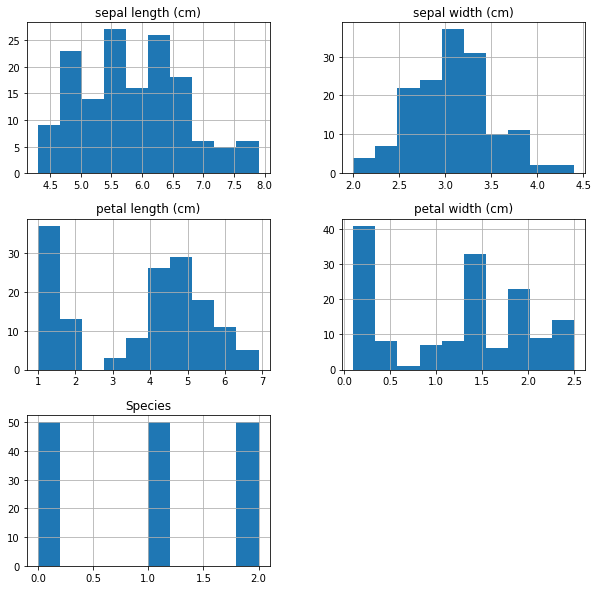

In [17]:
data.hist(figsize= (10,10))